In [1]:
import pandas as pd

# Data Ingestion

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/INeuron-Classes-Assignments/main/Assignments/291022/Admission_Predict_Ver1.1.csv")

# Explorative Data Analysis

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.isnull().value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP    LOR    CGPA   Research  Chance of Admit 
False       False      False        False              False  False  False  False     False               500
dtype: int64

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Removing unwanted column

In [10]:
df_new = df.drop(labels=['Serial No.'], axis=1)

In [11]:
df_new

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

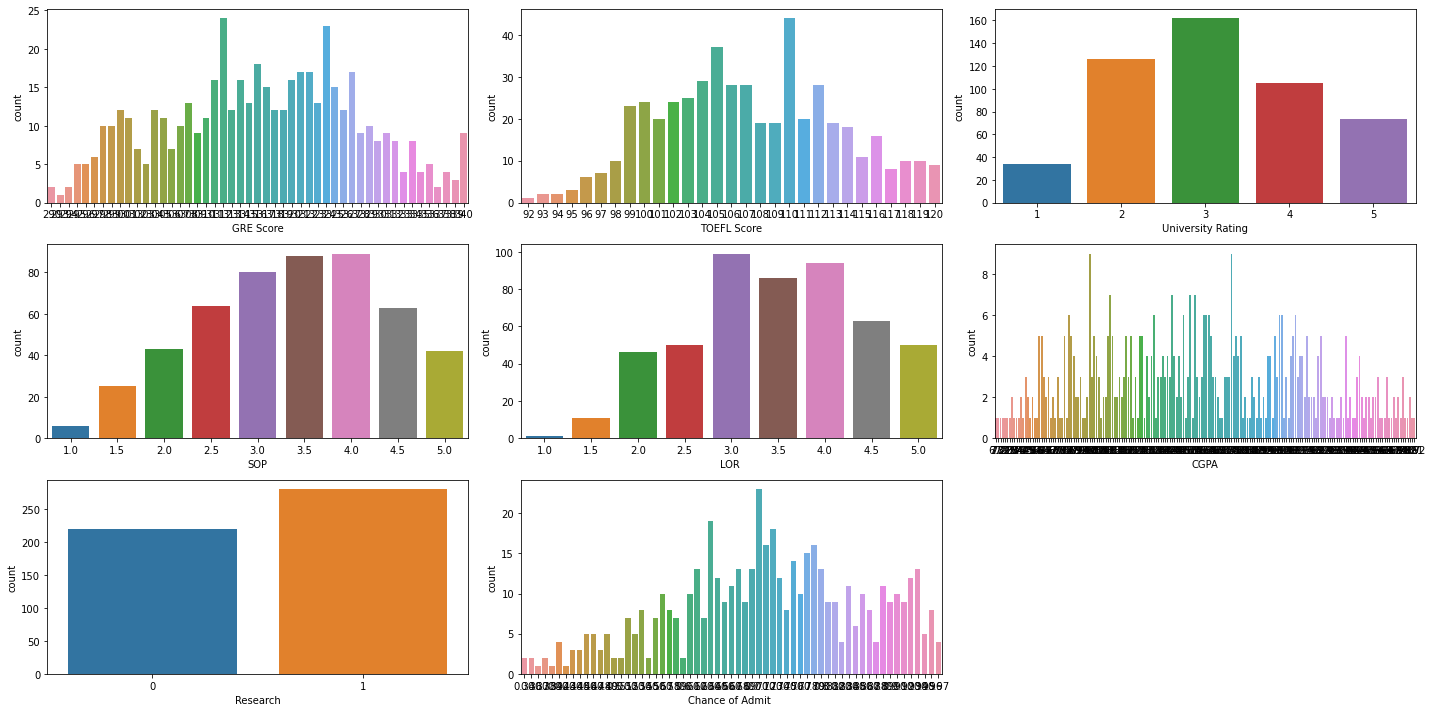

In [13]:
index = 1
plt.figure(figsize=(20, 10))
for feature in df_new.columns:
  plt.subplot(3, 3, index)
  sns.countplot(x=df_new[feature])
  plt.tight_layout()
  index += 1

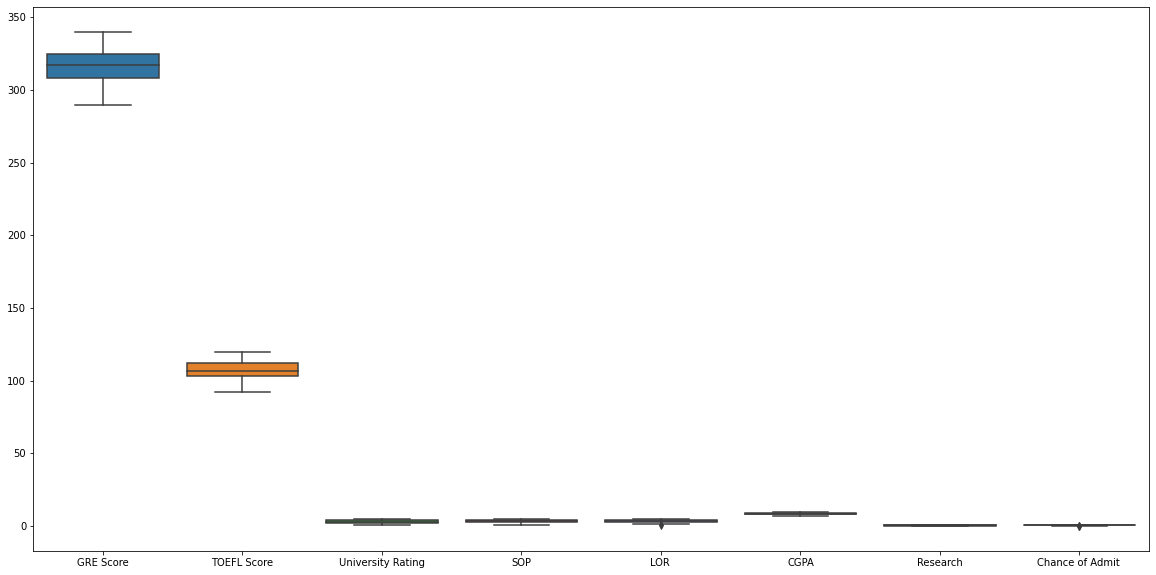

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_new)

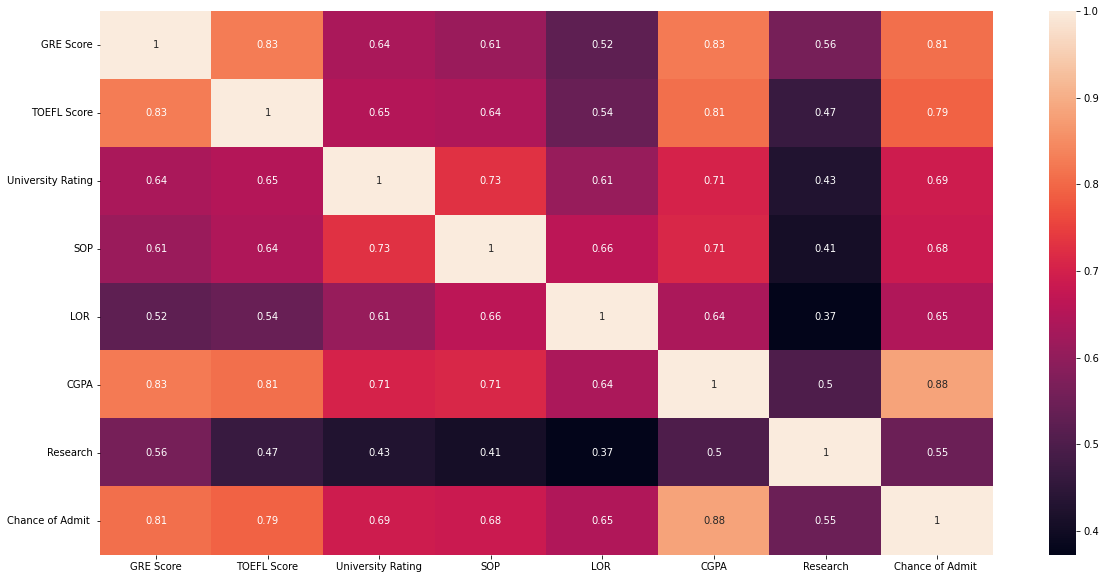

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_new.corr(), annot=True)

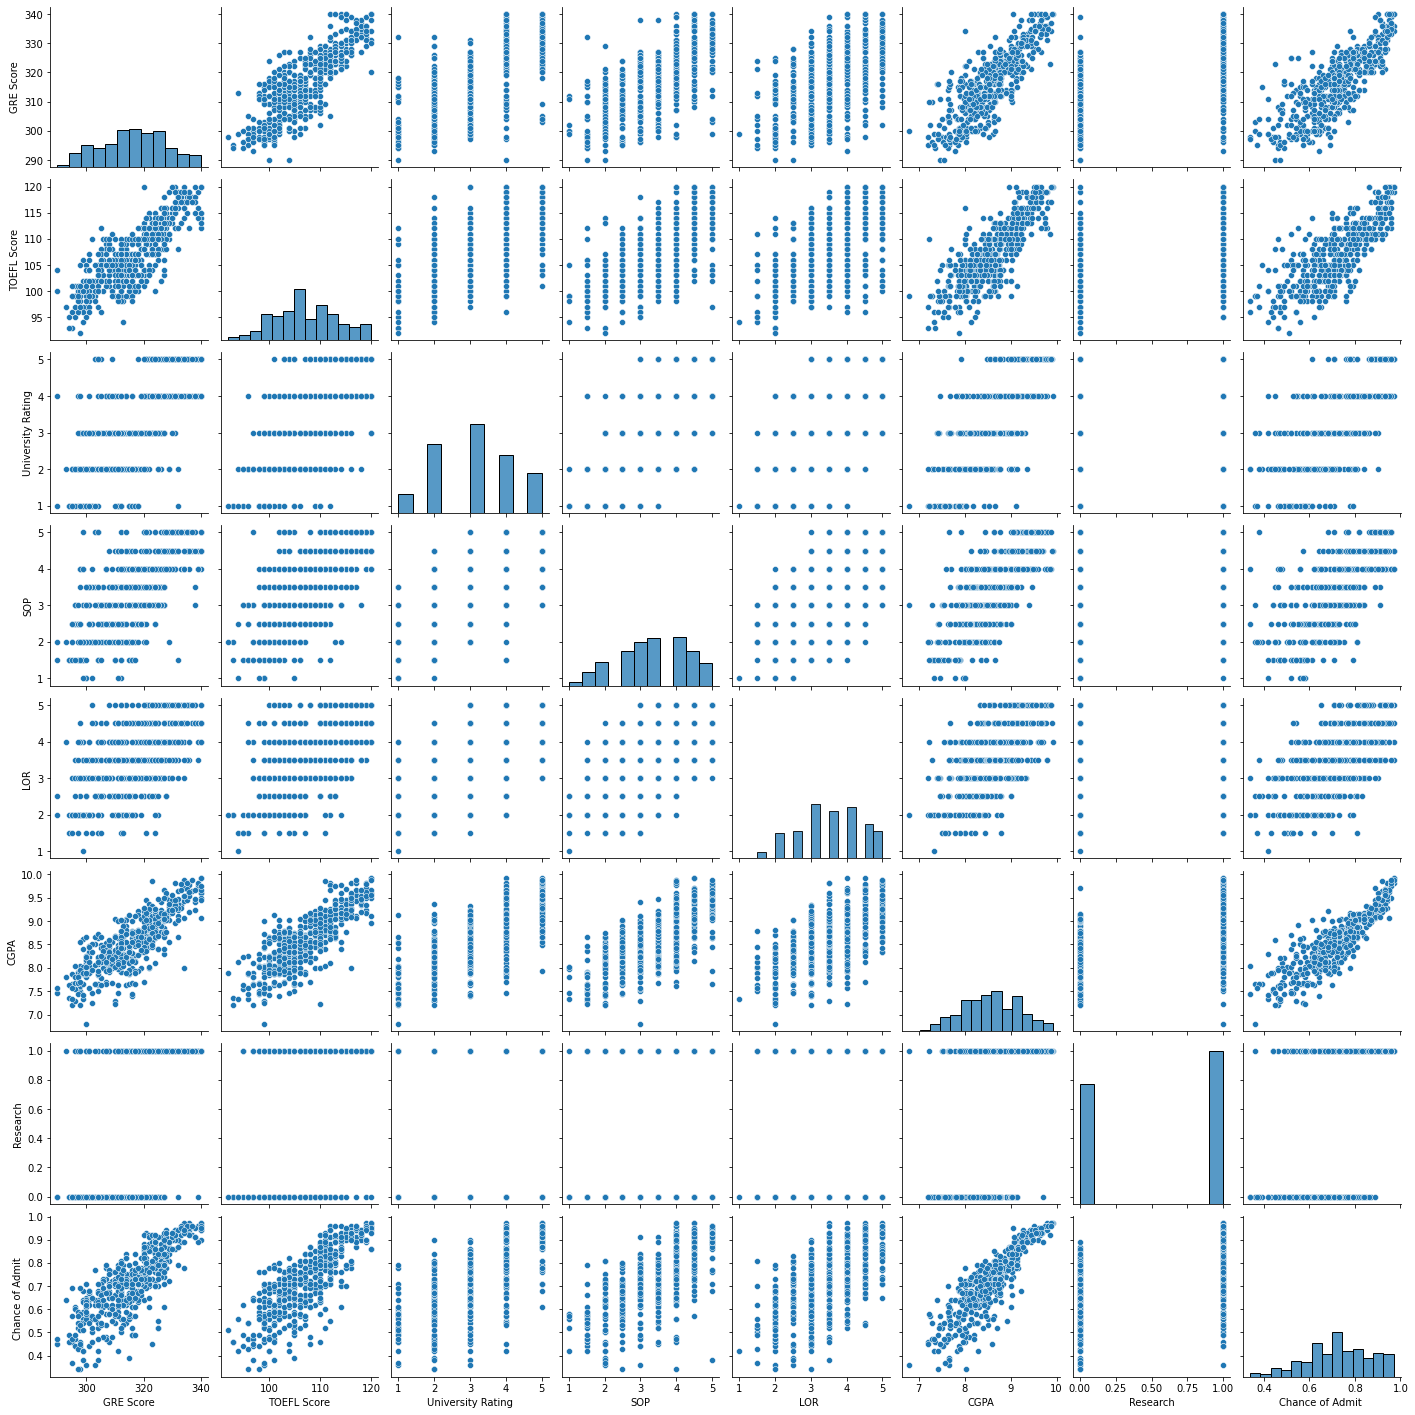

In [16]:
sns.pairplot(df_new)

# Model selection


In [17]:
X = df_new.iloc[:, :-1]

In [18]:
y = df_new.iloc[:, -1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=.20)

In [21]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

100 400 100 400


# Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train_ft = scaler.fit_transform(X_train)

In [25]:
X_test_t = scaler.transform(X_test)

# Model training

In [26]:
from sklearn.svm import SVR

In [27]:
svr_model = SVR()

In [28]:
svr_model.fit(X_train_ft, y_train)

SVR()

In [29]:
svr_model.score(X_test_t, y_test)

0.707601888019789

# Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
import numpy as np

In [32]:
params = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": np.linspace(0.1, 100, 7),
    "gamma": np.linspace(0.1, 1, 7)
}

In [33]:
gs_cv = GridSearchCV(svr_model, param_grid=params, verbose=3)

In [34]:
gs_cv.fit(X_train_ft, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.858 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.852 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.805 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.404 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.705 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.631 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rb

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([  0.1 ,  16.75,  33.4 ,  50.05,  66.7 ,  83.35, 100.  ]),
                         'gamma': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [35]:
print(gs_cv.best_params_)

{'C': 16.750000000000004, 'gamma': 0.1, 'kernel': 'linear'}


In [36]:
print(gs_cv.best_score_)

0.8204403194932425


# Performance metrics

In [37]:
from sklearn.metrics import r2_score

In [38]:
y_predict = svr_model.predict(X_test_t)

In [41]:
r2_score(y_test, y_predict)

0.707601888019789

# Cross validation

In [42]:
svr_model.predict([X.iloc[0]])

array([0.64633382])

In [44]:
df_new.iloc[0]

GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Chance of Admit        0.92
Name: 0, dtype: float64

# Pickling the model

In [47]:
import pickle

In [48]:
pickle.dump(svr_model, open('admission_prediction_svr_model.pkl', 'wb'))